In [2]:
import numpy as np
import cv2 as cv
import scipy.ndimage as scidi
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import spatial
import sklearn as skl

np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

Sigma = 3
L1 = 3230639.0
L2 = 22117.658797022443
Cos = 0.16698917548909953
Sigma = 5
L1 = 3102135.0
L2 = 21462.163380645903
Cos = 0.1716948867446968
Sigma = 7
L1 = 3018861.0
L2 = 20949.973500787186
Cos = 0.15778585004026713
Sigma = 9
L1 = 2983376.0
L2 = 20706.153120868777
Cos = 0.1640647229800518
Sigma = 11
L1 = 2962498.0
L2 = 20588.616664315643
Cos = 0.1837117889118962
Sigma = 13
L1 = 2961217.0
L2 = 20631.326042550518
Cos = 0.17619354064636994
Sigma = 15
L1 = 2941129.0
L2 = 20539.766864684807
Cos = 0.18152575045283248
Sigma = 17
L1 = 2917854.0
L2 = 20390.470990317826
Cos = 0.1870047487162465
Sigma = 19
L1 = 2894094.0
L2 = 20217.60584095046
Cos = 0.20747852709163395
Sigma = 21
L1 = 2874637.0
L2 = 20108.726927174444
Cos = 0.22607190350576456
Sigma = 23
L1 = 2850087.0
L2 = 19977.09590281819
Cos = 0.2241233378634997
Sigma = 25
L1 = 2819882.0
L2 = 19805.007752656886
Cos = 0.27105009639692


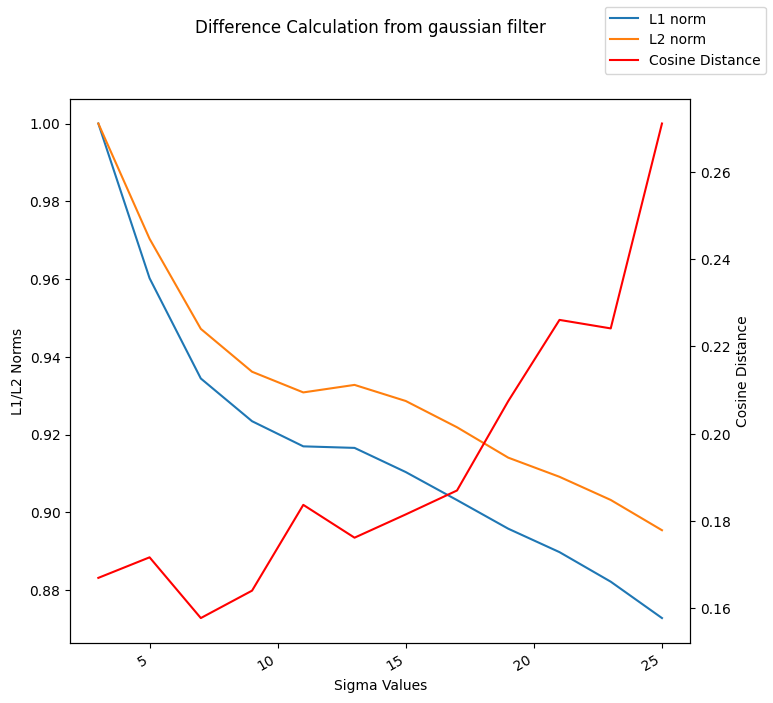

In [3]:
#Problem 2
# Write a code that takes an image, applies gaussian blur, and examines the impact of different gaussian blur on
# different Distance metrics
with Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg") as pic:
    pic = pic.resize((150,150))
    pic = ImageOps.grayscale(pic)
    S1 = scidi.gaussian_filter(np.uint8(pic),sigma = 3)
    Image.fromarray(S1).save("HW4Q2S3.jpg")
    S2 = scidi.gaussian_filter(np.uint8(pic),sigma = 7)
    Image.fromarray(S2).save("HW4Q2S7.jpg")
    S3 = scidi.gaussian_filter(np.uint8(pic),sigma = 11)
    Image.fromarray(S3).save("HW4Q2S11.jpg")

    X = []
    L1s = []
    L2s = []
    LCoss = []

    for i in range(3,27,2):
        S = scidi.gaussian_filter(np.uint8(pic),sigma = i)

        L1 = np.linalg.norm((S-pic).flatten(),ord = 1)
        L2 =  np.linalg.norm(S-pic,ord = 2)
        LCos = spatial.distance.cosine( np.asarray(S).flatten(),np.asarray(pic).flatten())
        print("Sigma = %s" %i)
        print("L1 = %s" %L1)
        print("L2 = %s" %L2)
        print("Cos = %s" %LCos)


        X.append(i)
        L1s.append(L1)
        L2s.append(L2)
        LCoss.append(LCos)

    L1s /= max(L1s)
    L2s /= max(L2s)


    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()

    ax1.plot(X, L1s,label = "L1 norm" )
    ax1.plot(X, L2s, label = "L2 norm")
    ax2.plot(X, LCoss, label = "Cosine Distance", color = 'red')

    ax1.set_xlabel("Sigma Values")
    ax1.set_ylabel("L1/L2 Norms")
    ax1.tick_params(axis="y")

    ax2.set_ylabel("Cosine Distance")
    ax2.tick_params(axis="y")

    fig.suptitle("Difference Calculation from gaussian filter")
    fig.legend()
    fig.autofmt_xdate()
    fig.savefig('HW4Q2.png')



In [4]:
#3 asks us to create a random noise photo


def G(X,d):
    N = abs(np.random.rand(X.shape[0],X.shape[1]))
    alpha = d/np.sum(N)
    return X+alpha*N


TestArray = np.asarray([[2,4],[1,3]])
NoiseAdded = G(TestArray,4)
np.linalg.norm((TestArray-NoiseAdded).flatten(),ord = 1)

pic = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
pic = pic.resize((150,150))
pic = ImageOps.grayscale(pic)
pic.save("HW4Q3a.jpg")
S1 = G((np.asarray(pic)),10**4)
Image.fromarray(np.uint8(S1)).save("HW4Q3b.jpg")
S2 = G(np.asarray(pic),10**6)
Image.fromarray(np.uint8(S2)).save("HW4Q3c.jpg")
S3 = G(np.asarray(pic),10**7)
Image.fromarray(np.uint8(S3)).save("HW4Q3d.jpg")

print(np.linalg.norm((S1-pic).flatten(),ord = 1))
print(np.linalg.norm((S2-pic).flatten(),ord = 1))
print(np.linalg.norm((S3-pic).flatten(),ord = 1))




9999.999999999998
1000000.0
10000000.0


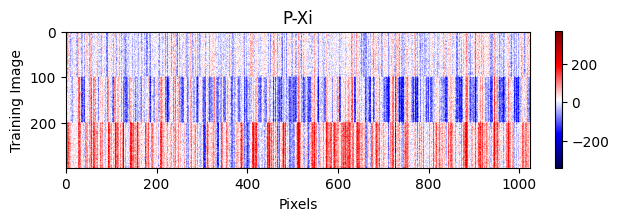

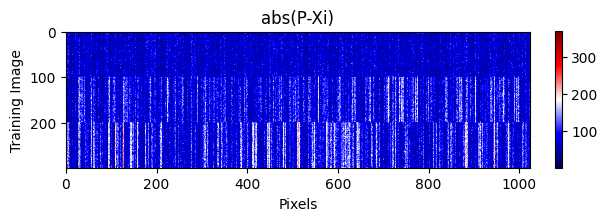

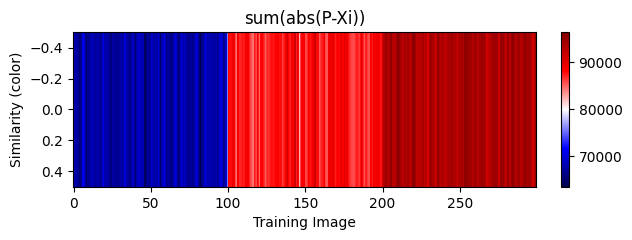

In [25]:
Me = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")
Me = Me.resize((32,32))
Me = ImageOps.grayscale(Me)
Me = np.uint8(Me)
dog = dog.resize((32,32))
dog = ImageOps.grayscale(dog)
dog = np.uint8(dog)
cat = cat.resize((32,32))
cat = ImageOps.grayscale(cat)
cat = np.uint8(cat)

TrainingDataset= []
TrainingLabels = []


Output1 = np.zeros((300,1024))
Output2 = np.zeros((300,1024))
Output3 = np.zeros((1,300))

P = G(np.asarray(Me),10**5)

for i in range(100):
    j = i+100
    k = i+200

    M = G(np.asarray(Me),10**5)
    D = G(np.asarray(dog),10**5)
    C = G(np.asarray(cat),10**5)

    TrainingDataset.append(M)
    TrainingLabels.append(1)
    TrainingDataset.append(D)
    TrainingLabels.append(2)
    TrainingDataset.append(C)
    TrainingLabels.append(3)

    Output1[i,:] = P.flatten()-M.flatten()
    Output1[j,:] = P.flatten()-D.flatten()
    Output1[k,:] = P.flatten()-C.flatten()

    Output2[i,:] = np.abs(Output1[i,:])
    Output2[j,:] = np.abs(Output1[j,:])
    Output2[k,:] = np.abs(Output1[k,:])

    Output3[0,i] = sum(Output2[i,:])
    Output3[0,j] = sum(Output2[j,:])
    Output3[0,k] = sum(Output2[k,:])

im = plt.imshow(Output1,cmap = 'seismic')
plt.title("P-Xi")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5aplot.png")
plt.show()

im = plt.imshow(Output2,cmap = 'seismic')
plt.title("abs(P-Xi)")
plt.xlabel("Pixels")
plt.ylabel("Training Image")
plt.colorbar(fraction=0.047*300/1024)
plt.savefig("5bplot.png")
plt.show()

im = plt.imshow(Output3,cmap = 'seismic',aspect = 100)
plt.title("sum(abs(P-Xi))")
plt.xlabel("Training Image")
plt.ylabel("Similarity (color)")
plt.colorbar(fraction=0.047*100/300)
plt.savefig("5cplot.png")
plt.show()






In [ ]:
Me = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\HW4SelfImage.jpg")
dog = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\dog.jpg")
cat = Image.open(r"C:\Users\dchap\Desktop\Classwork\ComputerVision\cat.jpg")
Me = Me.resize((32,32))
Me = ImageOps.grayscale(Me)
Me = np.uint8(Me)
dog = dog.resize((32,32))
dog = ImageOps.grayscale(dog)
dog = np.uint8(dog)
cat = cat.resize((32,32))
cat = ImageOps.grayscale(cat)
cat = np.uint8(cat)

TestSet = []
TestLabel = []
ConfusionMatrix = np.zeros((3,3))

for k in range(5,8,1):
    for i in range(10):
        TestSet.append(G(Me,10**k))
        TestLabel.append(1)
        TestSet.append(G(dog,10**k))
        TestLabel.append(2)
        TestSet.append(G(cat,10**k))
        TestLabel.append(3)





